# Pytorch Workflow

> In this Notebook you are going to learn about one of the ways of how a project is built using `Pytorch end-to-end Worflow`

![alt-text](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)



## What are we going to cover:

* Data (Preparing, Loading, Preprocessing)
* Building `Pytorch model`
* Fitting the model to data (training)
* Making Predictions and evaluating a model
* Saving and loading a model
* Putting it all together to understand much better

In [1]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.1.0+cu118'

## 1. Data Preparing and loading

* We are going to create some *known* data using the `Linear Regression Formula`

Linear regression: Y = a + bX

We will pre-define the weights and bias, that is B and A respectively

In [3]:
# Create some known params like weights and bias
weight = 0.7
bias = 0.3

# Create linear dataset
START = 0
END = 1
STEP = 0.02
X = torch.arange(START, END, STEP).unsqueeze(dim=1)
y = weight * X + bias # y = a + bx

In [4]:
X[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]))

In [5]:
y[:10], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

### Splitting data Train and Test sets

* `Training set`: Data used for model to train up on | `~70-80%` | `Always used`
* `Testing set`: Data used for testing model's testing accuracy while its training | `~10-15%` | `Always used`
* `Validation set`: Data used to test model against the wild and if it' ready for deployment. This is done after model training is over. | `~10-15%` | `Often, not always`

**What do you mean by Model is Generalized ?**
> Patterns found out by model which are generalized and can be applied, to even unseen data while it predicts with good accuracy!

In [6]:
# Create a train test split
train_split = int(len(X)*0.8)
train_split

40

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [8]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### Visualizing our Linear Dataset using Matplotlib

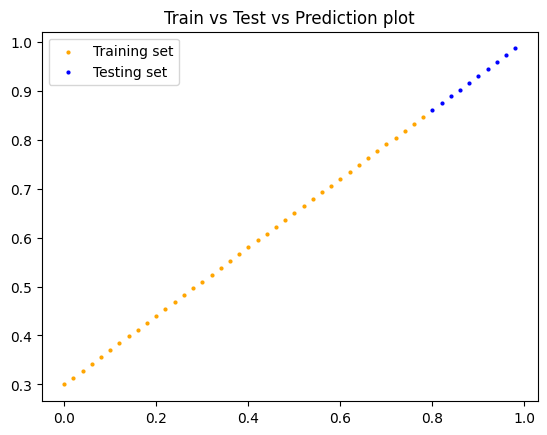

In [9]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  plt.scatter(X_train, y_train, color='orange', s=4, label='Training set')
  plt.scatter(X_test, y_test, color='blue', s=4, label='Testing set')
  if predictions != None:
    plt.scatter(X_test, predictions, color='green', s=4, label='predictions')
  plt.title('Train vs Test vs Prediction plot')
  plt.legend()
  plt.show()

plot_predictions()

## 2. Build Pytorch Model

* Almost everything in Pytorch inherits from `torch.nn.Module`

Model built here, has the following goal:
> `Model Goal`: Find out the best values of weights and bias, such that it suits the representation of data. These weights and biases can be called Patterns

**Keep in mind, value of weight and bias are known to us already!!**

In [10]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Random initialization of weights and bias
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  # Forward propagation (Linear Regression Formula)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Pytorch model building essentials

* **`torch.nn`** - contains all of the building blocks (layers, models, loss-functions, activations, etc) for building neural network models using Pytorch!!

* **`torch.nn.Parameter`** - helps us make some paraemters for the model, often a Pytorch Layer from `torch.nn` will set these parameters using `torch.nn.Parameter`for for us!!

* **`torch.nn.Module`** - base class for all neural network modules, if you sublcass it, you will have to overwrite the `forward()` which allows us to perform `Forward Propagation`

* **`torch.optim`** - contain optimizers in Pytorch that are required for performing `Gradient Descent` and `Backpropgation` while training model

> **def forward()** - defines how `Forward Propagation` takes place in `Models`

### Checking the contents of our Simple Neural Network Pytorch model

So we can check out our model parameters or what's inside our moedl using `.parameters()`

In [11]:
# Create a random seed
# because we want the same random initialized weights and bias to occur
torch.manual_seed(42)

# Create an instance of our Linear Regression Model
model_0 = LinearRegressionModel()

# Check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [13]:
weight, bias

(0.7, 0.3)

## Predicting with our Randomly initialized Model

> Use: `torch.inference_mode()` when making predictions

* When we pass our data to the model, its going to run it through the `forward()` method, therefore doing the `forward propagation`. Moreover, it just uses the Linear Regression formula with weigths and bias randomly initialized as we saw!!

In [14]:
X_test, X_test.shape, y_test, y_test.shape

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 torch.Size([10, 1]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 torch.Size([10, 1]))

### **What is `torch.inference_mode()`**
> Well, our Pytorch model, when defining model training parameters, switches on `requires_grad = True`, which means, that the parameter values will be tracked and for gradients to be computed during `Backpropagation & Gradient Descent`, it stores the values!!

> However, we often tend to use `torch.inference_mode()` while we are making predictions on test data! When we use this method, it switches off all `gradient tracking`, therefore none of the parameters are stored, and hence it results to the data just flowing through the model `(forward propagation)`, therefore decreasing the time taken for making predictions by the model


* **You can also use torch.no_grad() as well, but torch.inference_mode() is preferred as it seems most of the times work faster!!**

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

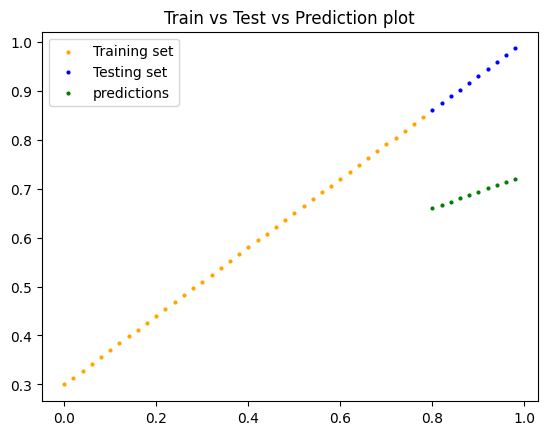

In [16]:
plot_predictions(predictions=y_preds)

## 3. Train Model

We have to add a lot of things to our model while training it:
* **`Training Loop & Testing Loop`**: This is where model training, gradient descent, back-propagation and evalutating models using test data happens!!
* **`Loss Function`**: Calculates the loss between actual vs predicted! | **Lower is better!!**
* **`Optimizer`**: Takes the loss and optimizes model, by using **Gradient Descent & Backpropagation** to manipulate trainable parameters, so to decrease loss!

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (SGD- Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [20]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Building a Training loop (and testing loop) in Pytorch

> A few things we need in a training loop:
* **Loop through data**
* **Forward Propation** (flowing of data through the Neural Network)
* **Calculate Loss** (compare forward pass predictions to ground truth labels)
* **Optimize zero grad**: clear all the gradient calculation.
* **Backward Propagation**: (Move backwards to calculate the gradients of each of the parameters in our model with respect to loss, and which direction they should be going)
* **Optimizer Step**: use optimizer to adjust our model's parameters, so that they are able to reduce loss, and go towards minima (**Backpropagation**)

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [22]:
EPOCHS = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through data
for epoch in range(EPOCHS):
  # Set model to training mode
  model_0.train() # train mode sets all
  # model parameters' property to requires gradients computation to True

  # 1. Forward Propagation
  y_preds = model_0(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_train, y_preds)

  # 3. Optimizer zero grad - optimizer makes gradients for each parameter,
  # but once we go to next batch/epoch they all should be cleared out,
  # so that weigths and bias do not follow the previous epochs gradients
  optimizer.zero_grad()

  # 4. Perform Backpropagation on the loss with respect to parameters
  # computes gradients for each model trainable parameter
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  # Based on the gradients, it updates the values of the parameters
  optimizer.step()

  model_0.eval() # turns off gradient tracking (faster in making predictions)
  with torch.inference_mode():
  # with torch.no_grad():
    # Do forward prpopagation
    test_preds = model_0(X_test)
    # Calculate loss
    test_loss = loss_fn(y_test, test_preds)

  # Printing Train/Test Loss and losses/epochs to list
  epoch_count.append(epoch)
  train_loss_values.append(loss.detach().numpy())
  test_loss_values.append(test_loss.detach().numpy())

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Train Loss/MAE: {loss} | Test Loss/MAE: {test_loss}')
    print(model_0.state_dict())


Epoch: 0 | Train Loss/MAE: 0.08169572055339813 | Test Loss/MAE: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | Train Loss/MAE: 0.06808149069547653 | Test Loss/MAE: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | Train Loss/MAE: 0.06258393079042435 | Test Loss/MAE: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | Train Loss/MAE: 0.05879194289445877 | Test Loss/MAE: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | Train Loss/MAE: 0.05530194193124771 | Test Loss/MAE: 0.13084018230438232
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | Train Loss/MAE: 0.051822252571582794 | Test Loss/MAE: 0.12050700187683105
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | Train Loss/MAE: 0.04838593676686287 | Test

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6962], requires_grad=True),
 Parameter containing:
 tensor([0.3064], requires_grad=True)]

In [25]:
with torch.inference_mode():
  y_pred = model_0(X_test)

In [26]:
y_pred

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [27]:
print(f'Test Loss: {loss_fn(y_test, y_pred)}')

Test Loss: 0.0030598342418670654


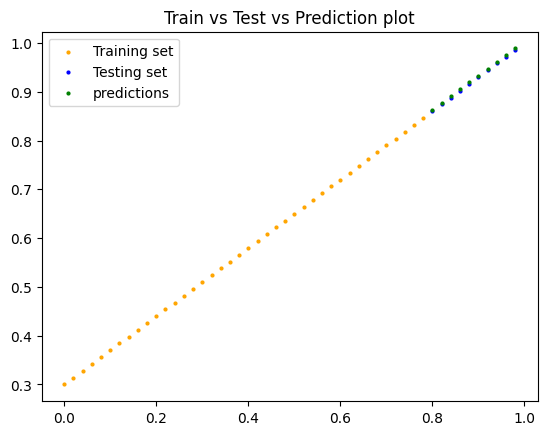

In [28]:
plot_predictions(predictions=y_pred)

#### Plotting the training loss and testing loss

In [29]:
train_loss_values[:5]

[array(0.08169572, dtype=float32),
 array(0.07951223, dtype=float32),
 array(0.07771821, dtype=float32),
 array(0.07596268, dtype=float32),
 array(0.07452543, dtype=float32)]

Text(0, 0.5, 'Loss')

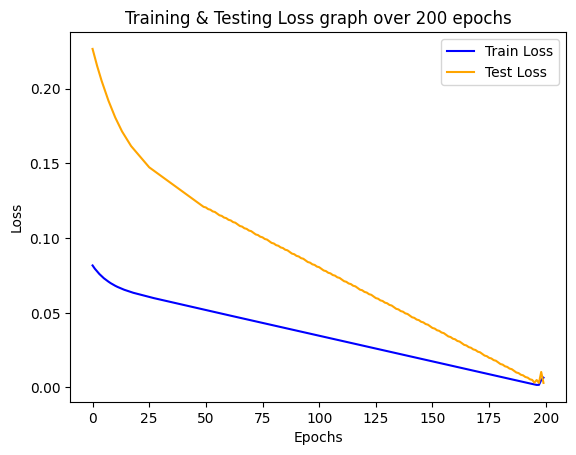

In [30]:
plt.title('Training & Testing Loss graph over 200 epochs')
plt.plot(epoch_count, train_loss_values, color='blue', label='Train Loss')
plt.plot(epoch_count, test_loss_values, color='orange', label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Saving and re-loading our Pytorch model

There are three main methods you should know about saving and re-loading models in PyTorch.

* **`torch.save()`** - allows you save a Pytorch object in Python's pickle format

* **`torch.load()`** - allows you to load a saved a Pytorch object
* **`torch.nn.Module.load_state_dict()`** - allows you to load a model's state dictionary

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [32]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_worflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/pytorch_worflow_model_0.pth')

In [33]:
# 3. Save the Model's state dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)
print(f'Model saved to: {MODEL_SAVE_PATH}')

Model saved to: models/pytorch_worflow_model_0.pth


In [34]:
# check the saved file path
!ls -l models/pytorch_worflow_model_0.pth

-rw-r--r-- 1 root root 1656 Oct 29 09:45 models/pytorch_worflow_model_0.pth


### Loading our Pytorch Model's state dictionary

> Since we have saved our Pytorch model's `state_dict()`, in order to load it back, we need to make a new instance of our `LinearRegressionModel()` class, where we can load these weight values

In [35]:
# Create a new instance of our Linear Regression model
loaded_model_0 = LinearRegressionModel()

# Loading our model's saved state dict into our new model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [36]:
# check if the loaded model has the same weight & bias values as the trained model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [37]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_y_preds = loaded_model_0(X_test)
loaded_y_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [39]:
print(f'Test Loss: {loss_fn(y_test, loaded_y_preds)}')

Test Loss: 0.0030598342418670654


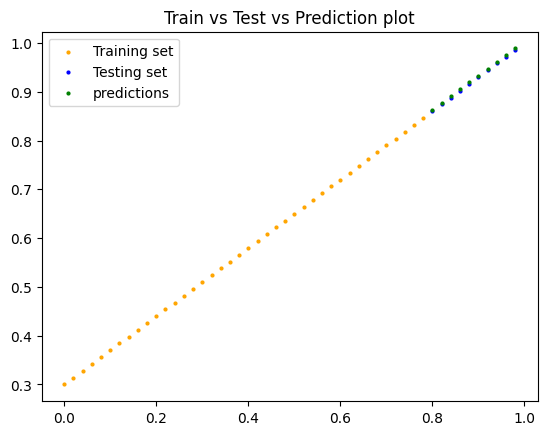

In [40]:
plot_predictions(predictions=loaded_y_preds)